Let's use matplotlib to explore a bit of data. I'm going to focus here on just using the library to build
basic charts you are probably already familiar with, and then we'll go on to some more in depth examples of
how to do visual exploration of data and data analysis.

In [1]:
# First, let's bring in matplotlib and turn off the Jupyter display figure magic.
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_close
set_matplotlib_close(False)

# And of course we'll bring in pandas and numpy
import pandas as pd
import numpy as np

In [2]:
# Now, the data I'm going to use is something called Anscombe's quartet. It's an interesting historic dataset
# that was used to demonstrate the important of visual exploration. You can read more about it at wikipedia,
# and I've left the code I used to get the data from wikipedia below, but I've commented it out and just
# left it for you to see if you're interested.
dataset=pd.read_html("https://en.wikipedia.org/wiki/Anscombe%27s_quartet", skiprows=1)[1]
dataset.columns=["x1","y1","x2","y2","x3","y3","x4","y4"]
dataset.to_csv("quartet.csv", index=False)

In [3]:
df=pd.read_csv("assets/quartet.csv")
df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [4]:
# So, the point of Anscombe's quartet is to demonstrate that certain summary statistics might look the same or
# nearly the same between different values, but that when we graphically examine them they look quite different.
# For instance, let's calculate the mean of each column
df.agg(np.mean)

x1    9.000000
y1    7.500909
x2    9.000000
y2    7.500909
x3    9.000000
y3    7.500000
x4    9.000000
y4    7.500909
dtype: float64

In [5]:
# So we see that the mean of the X values is all identical, at 9.0, and that the mean of Y values are all
# identical as well, at just a smidge over 7.5 Let's check how correlated the X and Y values are between our
# four series of data
import scipy.stats as stats

for i in range(1,5):
    print("pearson for {} values is {}".format(i,stats.pearsonr(df['x{}'.format(i)],df['y{}'.format(i)])))

pearson for 1 values is (0.8164205163448399, 0.0021696288730787927)
pearson for 2 values is (0.8162365060002427, 0.0021788162369108027)
pearson for 3 values is (0.8162867394895982, 0.002176305279228025)
pearson for 4 values is (0.8165214368885029, 0.002164602347197218)


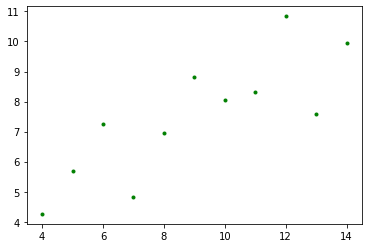

In [6]:
# Ok, so even the correlation between the X and Y values across each series is almost identical! And it turns
# out that a number of other statistical properties, such as the variance, or the fit of a regression line,
# are very similar as well. However, we can often visualize many different kinds of variation at once, and
# plotting these points can produce more insight.

# Let's check the first series, I'm going to plot this as a scatter plot. To do so we just pass in our X and Y
# values as the first two parameters. We can also add a third parameter for the format of the points to use.
# This follows a sort of mini programming language, right now I'll just use g. which means a green dot
plt.figure()
plt.plot(df['x1'],df['y1'],'g.')
plt.show()

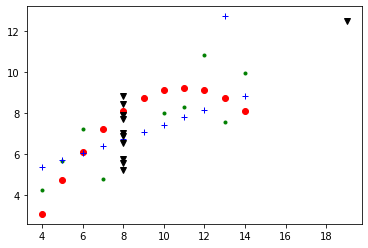

In [7]:
# Ok, great, a bunch of seemingly random plots. I'm going to plot the next three series as well, and change
# the color and the marker type, then rerender the plot. You can check the docs for more details on color
# and marker shapes
plt.plot(df['x2'],df['y2'],'ro')
plt.plot(df['x3'],df['y3'],'b+')
plt.plot(df['x4'],df['y4'],'kv')
plt.show()

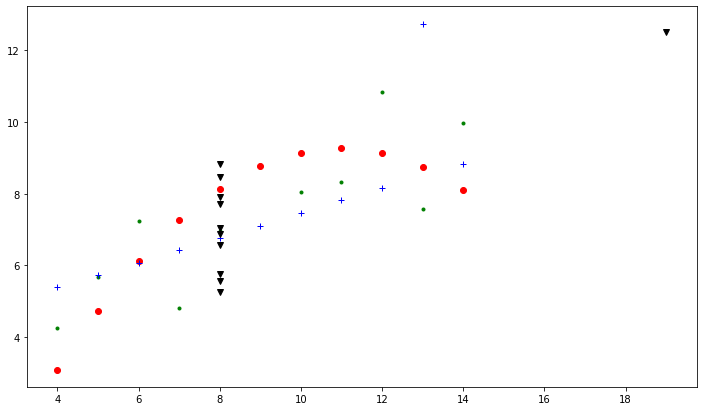

In [8]:
# Wow, this looks quite different! Let's change the size of that figure to get a better sense of what has
# happened
plt.gcf().set_size_inches(12,7)
plt.show()

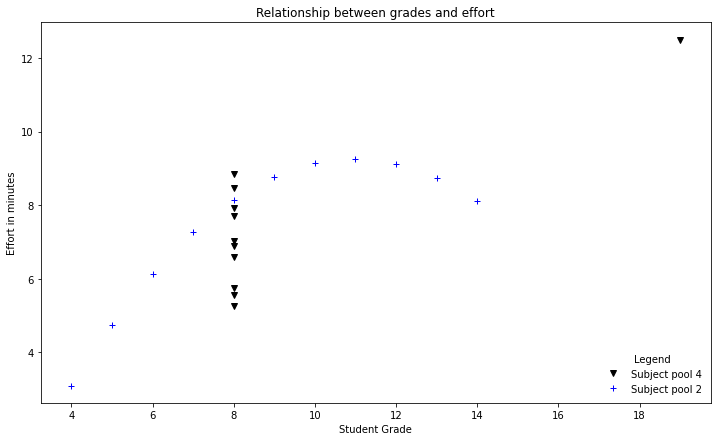

In [9]:
# So we can see here that the fourth series, the black triangles, have one strong outlier. The red circles,
# which were the second series, form a gentle curve. The first series was scattered all around, and the blue
# plus signs, which were our third series, are mostly in a horizontal line.

# Despite the summary statistics looking very similar, we see there are very much different relationships
# between data points, and that's one of the reasons we engage in exploratory data analysis. Now, what does
# this mean for a given analysis? That really depends on what the analysis is of. If the x axis was the
# predicted grade of a student and the y axis was the amount of time they have spent on a given task, I would
# probably come to different conclusions if I were looking at the black triangles (which suggests that time on
# task is pretty meaningless, except for that one individual in the upper right) than if I were looking at the
# blue plus signs (which suggests that for the most part people benefit from even a small increase in time on
# task)

# Here are a couple of things I might do to improve this visual if I were looking at it. First I would clear
# the axis
plt.cla()

# Then I would plot my data, here I'll also add a label for my data which is more meaningful
plt.plot(df['x4'],df['y4'],'kv', label="Subject pool 4")
plt.plot(df['x2'],df['y2'],'b+', label="Subject pool 2")

# Then I would add some descriptive text
plt.title('Relationship between grades and effort')
plt.xlabel("Student Grade")
plt.ylabel("Effort in minutes")

# Next I might want to make sure the legend is rendered, in this case I'll set its location and some of the
# graphical framing for the legend. a Value of 4, which you can read about in the docs, means the legend
# should appear in the lower right hand corner
plt.legend(loc=4, frameon=False, title='Legend')

# Now let's render it
plt.show()

In [ ]:
# Nice! This plot is looking meaningful and useful. You can see though, there are a lot of different little
# options to matplotlib in order to build the kind of plots you might be interested in.

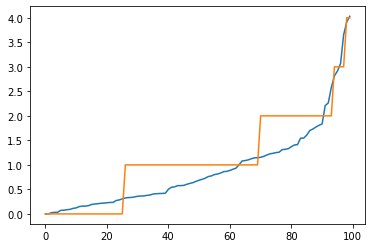

In [10]:
# Let's move on to discuss another kind of two dimensional data plot, the line plot. Now in the matplotlib
# scripting interface this is the same thing as a scatter plot, it's just that the points in your series are
# connected by lines. Let's close our previous figure and create a new figure
plt.close()
plt.figure()

# Now let's bring in a set of datapoints. Here I'm going to create the set using numpy distributions for my
# y values. First, I'll pull in some exponential values, and I'll sort them from lowest to highest
y1=sorted(np.random.exponential(size=100))

# Then we can use the poisson distribution, again I'll sort
y2=sorted(np.random.poisson(size=100))

# The x values will be the same for both of the plots, just a set of linearly increasing values
x=np.arange(100)

# Now we'll just try and plot them
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

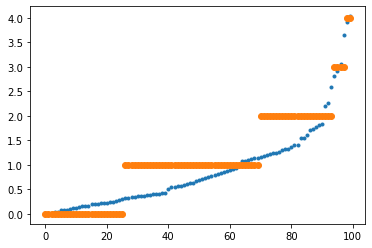

In [11]:
# See? Very easy with matplotlib, it's going to try and plot things automatically as a line plot unless you
# tell it otherwise. Want to turn this into a scatter plot instead? Then you can just add a marker type as
# the third parameter on plot
plt.cla()
plt.plot(x,y1,'.')
plt.plot(x,y2,'o')
plt.show()

In [12]:
# Let's look at a more realistic example, let's say I wanted to compare the temperature in January and
# February of 2018 2019 in Ann Arbor. First we need to get the data, I headed over to the NOAA site and
# downloaded it from there https://www.ncdc.noaa.gov

# Next we need to bring in the two datasets, let's use pandas
df18=pd.read_csv("assets/1892728.csv")
df19=pd.read_csv("assets/1892713.csv")
df19.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT08
0,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2019-01-01,6.93,229,0.0,NaN,37,27,270,290,18.1,23.9,1.0,NaN,NaN,NaN
1,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2019-01-02,6.93,2320,0.0,NaN,33,26,230,240,23.0,29.1,1.0,NaN,NaN,NaN
2,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2019-01-03,11.41,230,0.0,NaN,37,29,240,260,19.9,28.0,NaN,NaN,NaN,NaN
3,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2019-01-04,5.37,1344,0.0,NaN,49,26,200,190,15.0,19.0,NaN,NaN,NaN,NaN
4,USW00094889,"ANN ARBOR MUNICIPAL AIRPORT, MI US",2019-01-05,7.16,2249,0.0,NaN,50,23,280,290,17.0,23.9,1.0,NaN,NaN,1.0


In [13]:
# So these are just dataframes from a weather station at the airport. We see there is a bunch of missing data
# as well as our TMAX and TMIN for maximum and minimum data. Lets join these dataframes together
df=pd.concat([df18, df19])

# And let's reset the index, since concat() will use the original indicies which are meaningless now
df=df.reset_index()

# Now lets pull the year out of the date. You might remember this is actually easy for us to do with the
# str.extract function of the dataframe, which takes in a regex, then we can just merge those across
df=pd.merge(df,df["DATE"].str.extract("(?P<year>.{4}).(?P<month_day>.{5})"), left_index=True, right_index=True)

# Ok, let's now just keep our max and min columns for temperature, as well as our new date info
df=df[["year","month_day","TMAX","TMIN"]]

# Let's take a look at what we have
df.head()

,year,month_day,TMAX,TMIN
0,2018,01-01,12.0,-12.0
1,2018,01-02,14.0,0.0
2,2018,01-03,16.0,0.0
3,2018,01-04,16.0,0.0
4,2018,01-05,7.0,-13.0


In [14]:
# And now let's setup our figure. We'll do one year at a time, let's make a new function
def plot_temp(year):
    # first let's close the existing figure if there is one, since we're using the scripting interface
    plt.close()
    plt.plot(df.where(df["year"]==year).dropna()["TMAX"], label="{} Maximum Temperature".format(year))
    plt.plot(df.where(df["year"]==year).dropna()["TMIN"], label="{} Minimum Temperature".format(year))

    # Now let's add a legend
    plt.legend(loc=4, frameon=False, title='Legend')

    # And some axis labels
    plt.ylabel("Temperature")
    plt.xlabel("Day")
    plt.show()


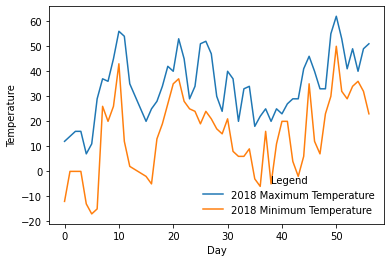

In [15]:
# Now let's see what that looks like for 2018
plot_temp("2018")

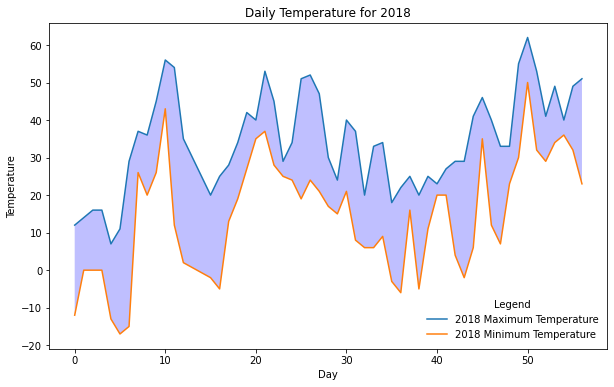

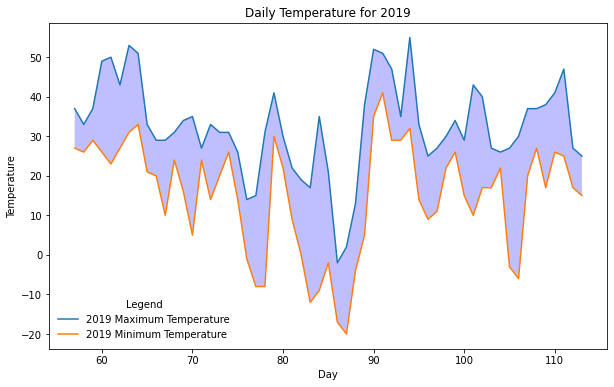

In [16]:
# Not bad! A couple of adjustments. Let's make a few tweaks to the display
def plot_temp(year):
    # first let's close the existing figure if there is one, since we're using the scripting interface
    plt.close()
    
    # Let's manually create the figure so we can set the size
    plt.figure(figsize=(10,6))
    
    # and we'll still plot the data on it like we did before
    plt.plot(df.where(df["year"]==year).dropna()["TMAX"], label="{} Maximum Temperature".format(year))
    plt.plot(df.where(df["year"]==year).dropna()["TMIN"], label="{} Minimum Temperature".format(year))

    # Now let's give matplotlib some freedom to put the legend wherever it feels appropriate
    plt.legend(loc=0, frameon=False, title='Legend') # 0 means "best"

    # And some axis labels
    plt.ylabel("Temperature")
    plt.xlabel("Day")
    
    # As well as a title
    plt.title("Daily Temperature for {}".format(year))
    
    # There's a handy function on the axis which allows us to shade the area between two series of data, this
    # will really help us see the size of the daily min/max swing. The general function signature is
    # fill_between(x, y1, y2), so to do this we need a list of the x axis values (our day), the minimum val,
    # and our maximum value. This is actually pretty easy, since we can just use the dataframe index for our
    # x values.
    plt.gca().fill_between(df.where(df["year"]==year).dropna().index,
                           df.where(df["year"]==year).dropna()["TMIN"],
                           df.where(df["year"]==year).dropna()["TMAX"],
                           facecolor='blue', alpha=0.25)
    
    # Now let's render it
    plt.show()

# Let's give it a try with 2018 and 2019 data
plot_temp("2018")
plot_temp("2019")

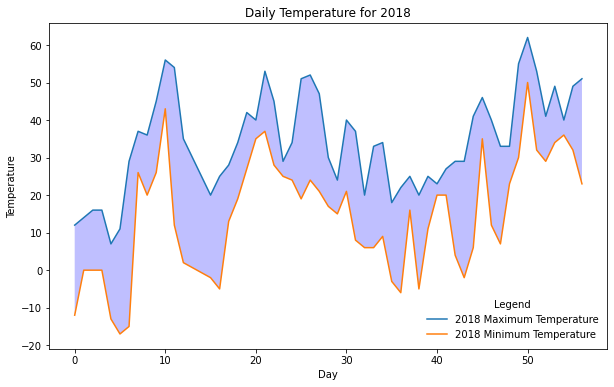

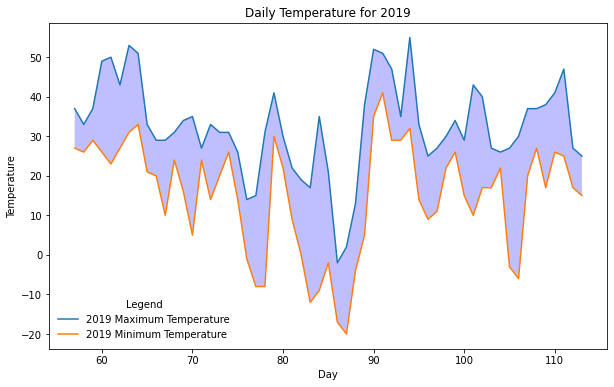

In [17]:
# Nice! Ok, let's touch on one more thing with matplotlib in Jupyter. Remember how we are starting each
# notebook telling Jupyter to set_matplotlib_close to False? What happens if we leave it as the default, True?
set_matplotlib_close(True)

plot_temp("2018")
plot_temp("2019")

In [18]:
# Well, in this case, not much! Everything works well and as expected. But underneath Jupyter has closed
# off the figures and they are no longer available for editing. For instance, if we look at the available
# fignums we get an empty list
plt.get_fignums()

[]

<AxesSubplot:>

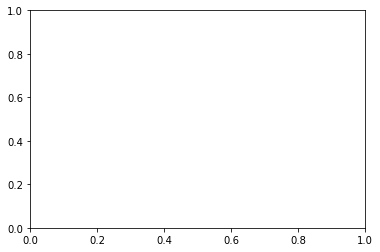

In [19]:
# Similarly, this means that the current axis and current figure now no longer exist, so we can't update
# the figure, and when we try and get the axis a new plot is created by default
plt.gca()

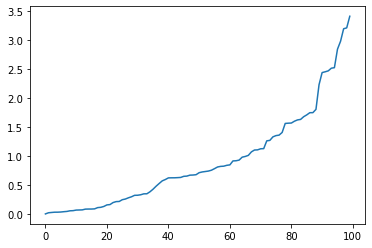

In [20]:
# This can all be a source of frustration if you're iteratively trying to build up the display of a plot,
# but the upside is it eliminates the need to call show() and you can plot data in just one line
plt.plot(range(0,100), sorted(np.random.exponential(size=100)))

In [ ]:
# Something to be aware of as you move forward using matplotlib.

# In this video you've been given a brief introduction to using matplotlib for two dimensional data using
# scatter plots. We've actually covered a lot - from the methodological showing why you would want to engage
# in visual exploration of data, using Anscombe's quartet as an example, down to the brass tacks of how to
# engage in this exploration using the matplotlib toolkit.

# As you've seen, there are a lot of different parameters you can use with matplotlib to control the way
# figures are rendered. To explore this, I highly recommend the docs, or a good reference book.